In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set aesthetic style for plots
sns.set_theme(style="whitegrid")

# 1. Load the Dataset
df = sns.load_dataset('titanic')


# 2. Ask Meaningful Questions
# ---------------------------------------------------------
"""
- What is the overall survival rate?
- Did social class (pclass) significantly influence survival?
- Did the "Women and Children First" policy hold true?
- Are there outliers in the ticket pricing (fare)?
- What data is missing and how might it affect our results?
"""

In [2]:
print("--- Data Info ---")
print(df.info())

print("\n--- Statistical Summary ---")
print(df.describe())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

--- Statistical Summary ---
         survived      pcla


--- Missing Values ---
age            177
embarked         2
deck           688
embark_town      2
dtype: int64


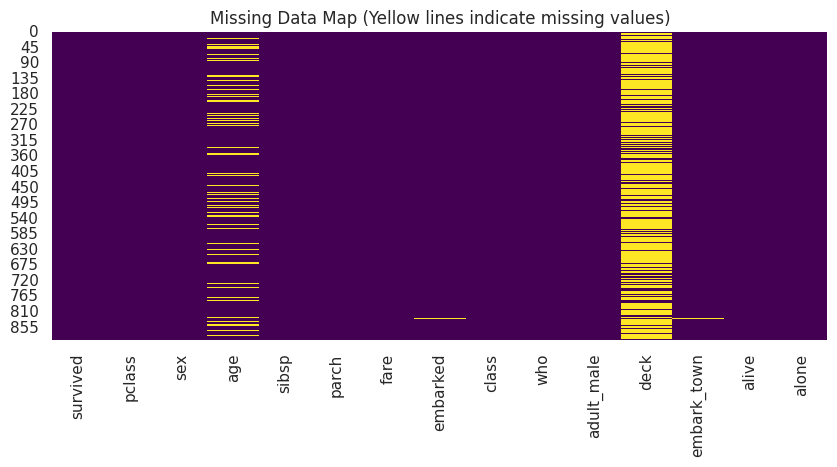

In [3]:
print("\n--- Missing Values ---")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

# Visualizing missing data
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Map (Yellow lines indicate missing values)')
plt.show()

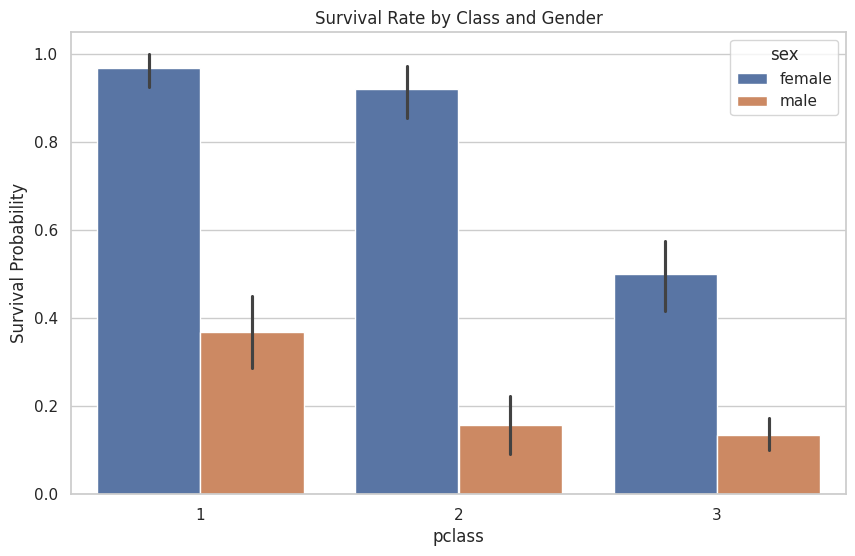

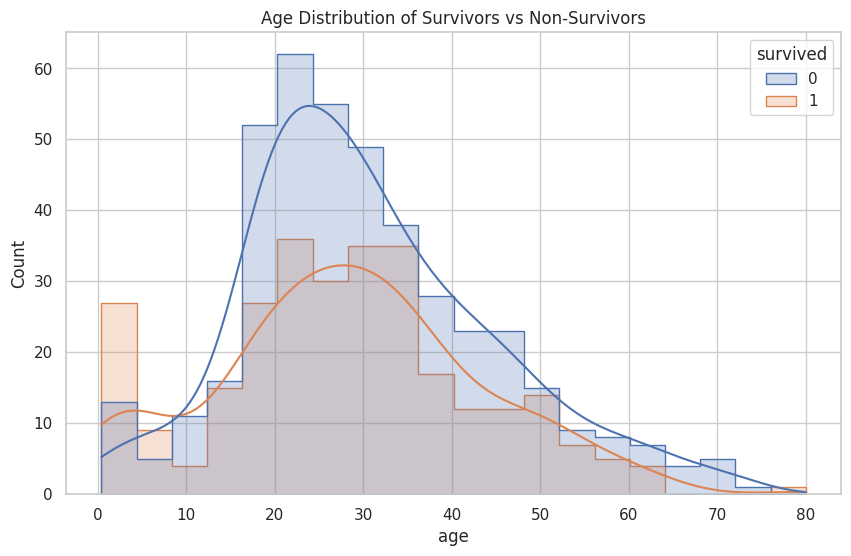

In [4]:
# A. Survival by Gender and Class
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', hue='sex', data=df)
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Probability')
plt.show()

# B. Age Distribution vs Survival
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='survived', kde=True, element="step")
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.show()

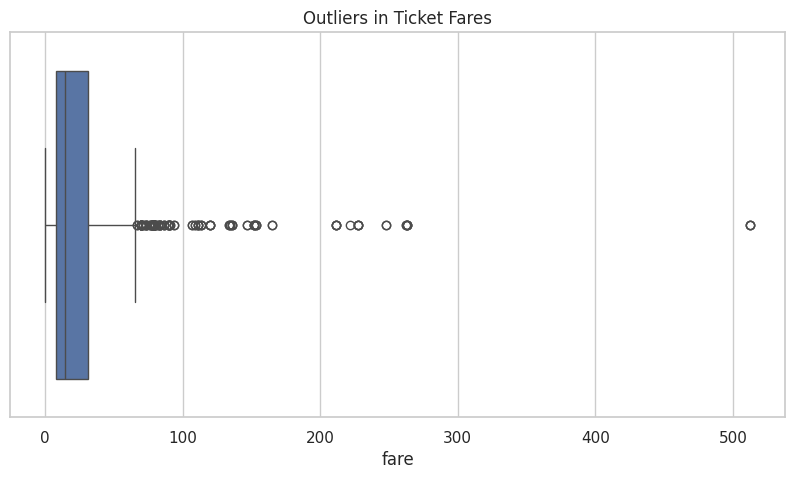

In [5]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='fare', data=df)
plt.title('Outliers in Ticket Fares')
plt.show()

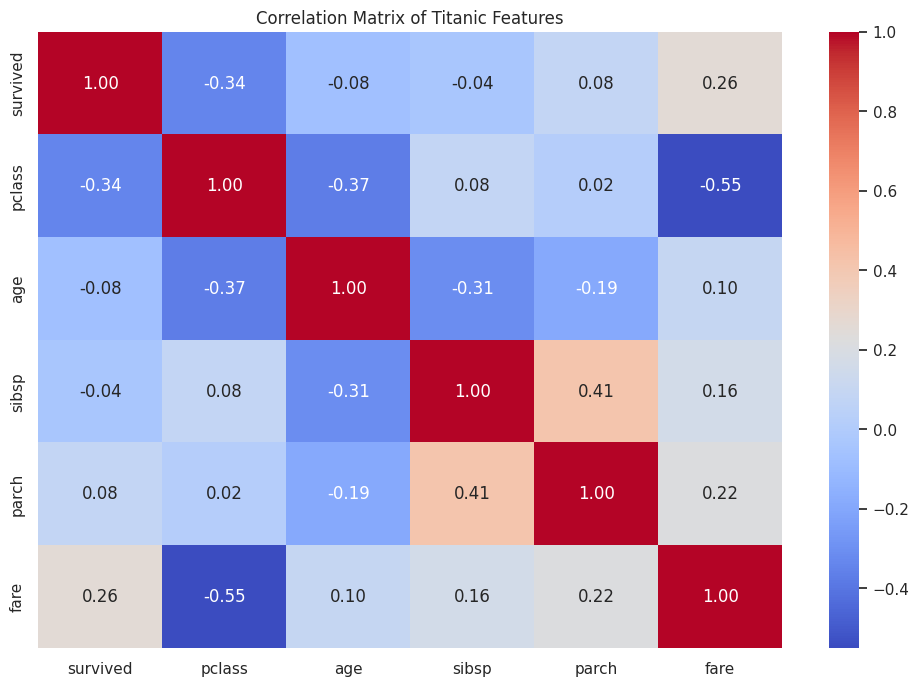

In [6]:
# Selecting only numeric columns for correlation
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Titanic Features')
plt.show()